# Crime in Sweden, distribution and trends. 

### Date: 2021-06-02

### Author: Mercy Lard 


## 

### Technical notes/References

#### Crime data source: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences
#### -> Survey of a selection of crimes distributed over a 70 year period.

#### Population data source: https://www.scb.se/en/

#### Data for Population by region, marital status, age and sex for years 1968-2020: http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkningNy/

-> Population data is taken from Statistical Crime Agency, or Statistiska Centralbyrån (SCB). Download: Variables selected as xlsx file. Observations: Population; Region: Sweden; Marital Status: Not selected; Age: Not selected; Sex: Not Selected; Year: Not selected

-> Population Information: The tables show the conditions on December 31st for each respective year according to administrative subdivisions of January 1st of the following year.

-> Official statistics: Yes, Latest update: 2021-02-22, Contact: Tomas Johansson, Statistics Sweden, +46 010-479 64 26, tomas.johansson@scb.se, (SCB) Statistikservice, Statistics Sweden, +46 010-479 50 00, information@scb.se

#### Popluation data source (older data): https://web.archive.org/web/20170216053029/http://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/yearly-statistics--the-whole-country/population-and-population-changes-17492015/

-> From this archive source, I retreive the population data from 1950-1967. Downloaded as an excel file.

#### Note:
We can control for changes in population by looking instead at the total number of crimes per 100K persons.

#### Understanding the data: 
Here you can find an English translation of the Swedish Criminal Code. https://www.government.se/press-releases/2020/01/an-up-to-date-english-translation-of-the-swedish-criminal-code/

The different data sets of crimes from Brå from different time periods and areas in Sweden:http://statistik.bra.se/solwebb/action/index

https://bra.se/statistik/kriminalstatistik/anmalda-brott.html

To see the full statistics on reported crimes for each section of the Swedish criminal code from 2008 - 2020: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences Under Reported offences select -> download tables -> period -> year.

Understanding the special case of why Sweden crime statistics might be higher when compared to international crime. 
https://en.wikipedia.org/wiki/Crime_in_Sweden

See further comments on international commparison: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html


## 

### Project goals - The Business Case


Here I present my steps for retrieving a selection of the crime data in Sweden for the last 70 years and how I look at trends with the aim to perform predictions on the time series data using machine learning and classical methods, and evaluate their performance. 

I will perform this analysis as a way to look at the broader picture in terms of crime in Sweden. 

-> Future aims <- 

From this I would like to look deeper into regions where crime is cocentrated and look for possible predictions of how it will develop in the coming years based on previous and current growth. 

I would then like to focus on the types of crimes and how they may be prevented or reduced with the help of surveillance or anti-theft services. 

This is relevant for crime prevention authorities, i.e. police and for security companies which would like to provide a tailored suite of anti-theft services to their clients. 

For example, if the crime for burglaries and breakins is quite low, but car theft is high, one could offer security cameras specifically for monitoring vehicles where applicable. Other security services may be developed from this knowledge.

## 


### ETL - data extraction, transformation and loading

In order to retrieve the files I downloaded the data from Brå, SCB and SCB web archived data. 

The way the table was structured made it a very slow process to try and import using pandas. In order to read the files with pandas into my jupyter nb, I first created a new csv and removed empty cells, spurious headers/titles and other unneccesary discriptions, such as notes listed above. I then renamed column headers to allow for easier and more descriptive naming, which would be compatible in SQL environments. There were very few columns (21 total), so it was simple to do by hand. 

For loading and transforming files for each year given monthly statistics, it would be best to use pandas or other parsing tools. 

Possible to use Alteryx to parse the data from different files: https://help.alteryx.com/current/designer/multi-row-formula-tool

Or use pandas to import from a messy excel file: https://towardsdatascience.com/read-messy-excel-files-like-a-pro-27880306ad0b

Or this if you have semi structured excel file: https://pbpython.com/pandas-excel-range.html

We must note that from the selection of crimes summarized by Brå, there are a few instances where the crimes are actually subcategories (sections, §) within the larger categories (Chapters).

### The column keys are as follows: all are given in terms of per 100K population statistics.

a.  year - the year ranges from 1950 - 2020

b.	total_crimes - total number of reported crimes

c.	total_penal_crimes - total crimes against the Penal Code

d.	total_life_and_health - Out of total crimes against Penal Code: Crimes against life and health (Ch 3).

e.	murder - Out of total crimes against life and health, those crimes consisting of Completed murder, manslaughter and assault resulting in death, (Ch. 3, § 1, 2, 5, 6).

f.	assault - Out of total crimes against life and health, those crimes consisting of assault, and aggravated assault. (Ch. 3, § 5,6 Assault not resulting in death)

g.	total_sexual_offence - Out of total crimes against Penal Code: Sexual offences (Ch. 6)

h.	rape - Out of total sexual offences, those crimes classified as rape (Ch. 6, § 1, 4)

i.	total_theft - Out of total crimes against Penal Code: Theft, robbery, and other offences of stealing (Ch. 8)

j.	burglary_no_guns - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms)

k.	burglary_home - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms, which occurred in flats, and private houses. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms: In dwellings, summer houses, etc: In flats, private houses)

l.	vehicle_theft - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include stolen vehicles. (Ch. 8, § 7 Vehicle theft: Car theft)

m.	theft_out_of_vehicle - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft out of a stolen vehicle. (Ch. 8, § 1, 2, 4 Other theft: From vehicle: Out of a motor vehicle)

n.	theft_shop - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft from shops, department stores etc. (Ch. 8, § 1, 2, 4 Other theft: From shops, department stores, etc.)

o.	theft_aggravated - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include robbery and aggravated robbery (i.e. with a weapon intended to harm). (Ch. 8, § 5,6)

p.	fraud - Out of total crimes against Penal Code: Fraud and other acts of dishonesty (Ch. 9)

q.	criminal_damage - Out of total crimes against Penal Code: Criminal damage (Ch. 12)

r.	total_other_penal_crimes - total OTHER crimes against Penal Code, Crimes against special penal legislation, not included in column c.

s.	narcotics - Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Narcotics Drugs (Penal) Act.

t.	driving_under_influence -  Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Road and Traffic Offences Act: Driving under influence of alcohol -incl. aggravated offences- (§ 4, 4a) AND Driving under the influence of illicit drugs -including aggravated offences- (§ 4 2 st)

u.	population - Population in Sweden total for 1950 - 2020


## 

 I will first start by importing relevant libraries, reading the data and looking at an overview of the dataframe. I will then go into exploratory data analysis and finally build my model. 

### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

#track execution time
import time

In [2]:
# For Notebooks # # For Notebooks connects JS to notebook
init_notebook_mode(connected=True)

In [3]:
# For offline use allows for ploting in cufflinks
cf.go_offline()

### Read in the data

#### Here we define the data frame as 'crime' when reading the csv file, while setting the index to year. This will make it easier to index the individual columns over time.

In [4]:
crime = pd.read_csv('Reported_crimes_analysis_per100K_1950_2020.csv', index_col='year')

#Note: can use parse_dates = True, but will need to address in plots. 
#It is advantageous when using decomposition method later.

In [5]:
type(crime.index)

pandas.core.indexes.numeric.Int64Index

### Overview of data

#### Here we can check to see that there are integers or floats with no null values in our columns.

In [6]:
#Check the data to see that there are no null items in the list and that the data is of the correct type. 
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2020
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   pop                       71 non-null     int64
 1   total_crimes              71 non-null     int64
 2   total_penal_crimes        71 non-null     int64
 3   total_life_and_health     71 non-null     int64
 4   murder                    71 non-null     int64
 5   assault                   71 non-null     int64
 6   total_sexual_offence      71 non-null     int64
 7   rape                      71 non-null     int64
 8   total_theft               71 non-null     int64
 9   burglary_no_guns          71 non-null     int64
 10  burglary_home             71 non-null     int64
 11  vehicle_theft             71 non-null     int64
 12  theft_out_of_vehicle      71 non-null     int64
 13  theft_shop                71 non-null     int64
 14  theft_aggravated          71 non-null  

In [7]:
#Check the first few years of data.
crime.head(20)

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
year,,,,,,,,,,,,,,,,,,,,
1950,70,2773,2297,120,1,105,40,5,1571,294,0,0,0,0,3,208,72,475,0,49
1951,71,3272,2743,124,1,109,45,6,1892,340,0,0,0,0,3,309,73,528,0,66
1952,72,3149,2598,119,1,103,39,4,1839,371,0,0,0,0,3,217,81,551,0,77
1953,72,2901,2681,118,1,105,44,5,1924,360,0,0,0,0,4,208,88,219,0,90
1954,72,3019,2783,125,1,107,41,5,1975,392,0,0,0,0,4,235,100,236,0,103
1955,73,3344,3090,135,1,118,44,5,2246,457,0,0,0,0,4,235,110,255,0,124
1956,73,3476,3204,132,1,116,38,5,2355,468,0,0,0,0,6,234,132,272,0,159
1957,74,3762,3508,132,1,116,36,5,2626,578,0,244,0,0,6,253,155,254,0,163
1958,74,4053,3781,127,1,113,40,6,2872,722,0,279,0,0,6,254,166,272,1,165


Looking at the data we can see that in the first 20 years recorded, we are missing data for certain crimes, namely, burglary from private residences, theft out of vehicles and shop theft. We also have very little data on narcotics up until 1965. 

One main reason for the missing data is that the Penal Code was not in force until 1965. Prior to this, there may have not been a difference in reporting and classification of these crimes, some of which were not yet included. 

The Penal Code for Narcotics was not enacted until 1968 for example, and thus the data is quite sparse before this. Prior to 1988, it was not illegal to consume drugs, and in 2002, Sweden inducted its first National Alcohol/Drug act Plan (ANDT) which alcohol, narcotics, drugs and tobacco.

In the modern digital and technological age, many new crimes have been included which previously did not exist, including internet threats, and theft of electric bicycles etc. 

Thus we can look at total crimes as a way to see the evolution of crimes as a whole, spending just a bit of time looking at the correlation of different crimes. We will first remove the years before the Penal Code was in effect. 

In [8]:
crime = crime.iloc[15:] #data will from 1965 and forward.


In [9]:
crime.head()

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
year,,,,,,,,,,,,,,,,,,,,
1965,78,5772,5065,166,3,150,51,8,3676,1037,98,395,713,123,12,429,296,707,9,212
1966,78,6036,5239,183,2,166,47,8,3719,1027,104,348,638,167,14,527,286,797,13,217
1967,79,6401,5537,188,2,172,49,8,3927,1083,108,383,637,204,13,546,313,864,51,228
1968,79,7150,6228,228,1,212,47,8,4230,1229,114,395,626,291,15,799,363,922,100,201
1969,80,7637,6009,240,1,222,42,8,4124,1126,116,382,572,254,16,678,374,1628,549,230


In [10]:
#Get a quick look at simple statistics of the data set.
crime.describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
pop,56.0,87.84,6.74,78.0,83.00,87.0,91.25,104.0
total_crimes,56.0,12216.82,2717.26,5772.0,10117.00,13344.5,14197.50,15261.0
total_penal_crimes,56.0,10433.39,2311.46,5065.0,8601.00,11757.0,12103.25,12736.0
total_life_and_health,56.0,576.52,275.51,166.0,304.00,580.0,871.75,1001.0
murder,56.0,2.11,0.80,1.0,2.00,2.0,2.00,4.0
assault,56.0,541.57,260.60,150.0,283.50,551.0,805.50,943.0
total_sexual_offence,56.0,96.39,62.83,29.0,45.25,82.5,134.00,241.0
rape,56.0,29.00,24.63,7.0,10.00,18.5,47.50,90.0
total_theft,56.0,6306.61,1417.64,3676.0,5489.25,6205.5,7644.00,8618.0
burglary_no_guns,56.0,1373.89,342.70,729.0,1034.50,1432.5,1665.75,1874.0


In [11]:
crime.iplot()

As we can see from the plot above, we have to separate out the different types of crimes to see more clearly how they are evolving over time and their relationships. We cannot easily visualize so many variables!

What we can see is that we have a clear upwards trend in total crimes from 1965 to 1990 and then a quick drop to 1994 followed by another very slow increase to 2020. 

Many crimes started to be defined under the time period between 1965 to 1990, where as after 1990, new technologies were developed, which could allow for better surveilance and crime prevention, this led to a quick down turn in crimes, e.g. in theft. It is also clear that with new technologies, new types of crimes emerge, e.g. internet crimes, including credit card fraud. Thus, we see an increase again in the 2000s. 

References: 
* http://www.fraudpractice.com/fl-fraudhist.html Online credit card fraud
* https://en.wikipedia.org/wiki/Closed-circuit_television#cite_note-17 CCTV surveillance 
* https://en.wikipedia.org/wiki/Vehicle_tracking_system Vehicle tracking systems
* https://popcenter.asu.edu/sites/default/files/library/crimeprevention/volume_11/08-Knutsson.pdf Swedish drug policy review (2000)
* https://en.wikipedia.org/wiki/Drug_policy_of_Sweden Drug policy in Sweden
* https://www.emcdda.europa.eu/drugs-library/public-health-agency-sweden-2020-comprehensive-evaluation-swedens-2016%E2%80%9320-alcohol-narcotics-doping-tobacco-strategy_bg Swedish ANDT strategy (2020)
* https://bra.se/download/18.cba82f7130f475a2f1800029525/1371914735045/1998_evaluation_1994_changes_in_legislation_on_driving_whilst_under_the_influence_of_alcohol.pdf Legislative change for DUI in Sweden (1999)
* https://www.bra.se/download/18.7d27ebd916ea64de5306c65f/1601393665407/2020_13_Reported_and_cleared_rapes_in_Europe.pdf Rape in Sweden/International Comparison (2020)



#### We create a new data frame with only subcategories such as those present under total_theft, or selectively plot these items together.

In [12]:
#Create a sub-df which looks at only theft under Ch. 8. 
theft = crime.loc[:,['burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated']]
theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1965 to 2020
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   burglary_home         56 non-null     int64
 1   vehicle_theft         56 non-null     int64
 2   theft_out_of_vehicle  56 non-null     int64
 3   theft_shop            56 non-null     int64
 4   theft_aggravated      56 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


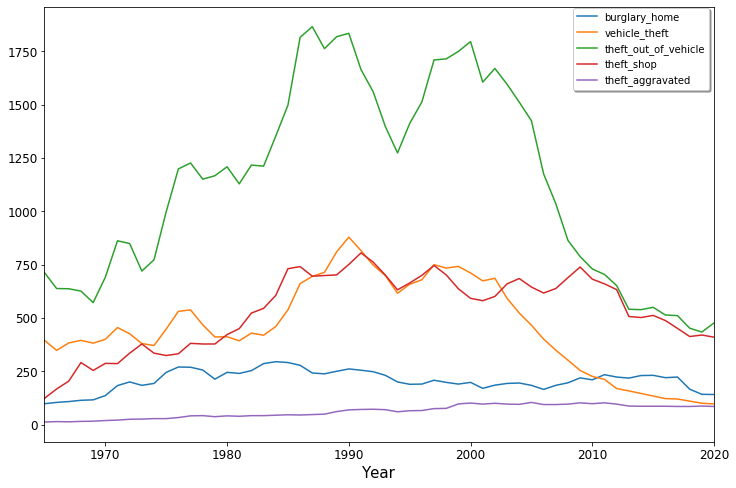

In [13]:
#Plot the theft over the full time period.
ax = theft.plot(figsize=(12,8))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set(xlim=(1965,2020))
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.0, 1.01))


We can then create a pairplot using sns on the theft data frame in order to see any correlation between variables.

CPU times: user 1.85 s, sys: 156 ms, total: 2.01 s
Wall time: 2.2 s


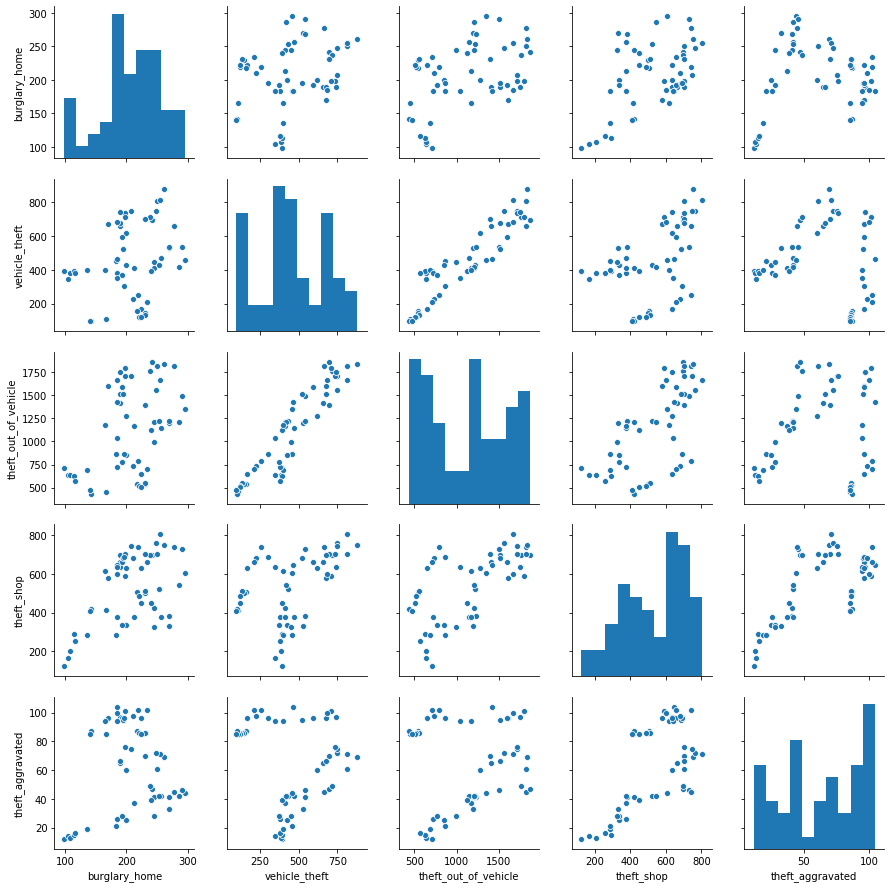

In [14]:
%%time
sns.pairplot(data=theft)

#Alternatively, one could call the variables from the original dataframe.
#sns.pairplot(data=crime, vars=['total_theft','burglary_no_guns', 'burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated'])

#Note axis formating with yticks will not work with sns pairgrid.


We can see that vehicle theft and theft out of a vehicle are most positively correlated. Which could suggest that, if a thief is already stealing a vehicle, they might also steal something from inside the vehicle, but not necessarily vice versa.

#### We can also perform a similar visualisation of correlation with seaborn's heatmap.

CPU times: user 120 ms, sys: 9.43 ms, total: 129 ms
Wall time: 151 ms


(5, 0)

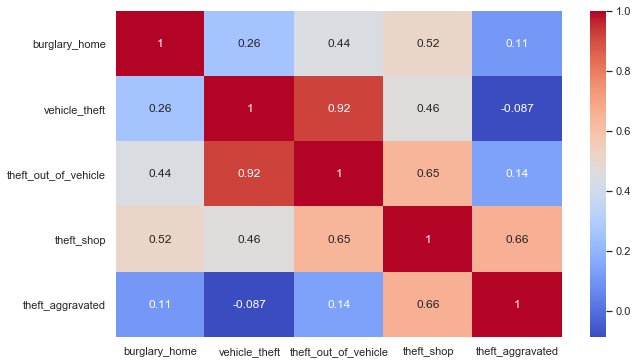

In [15]:
%%time
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(theft.corr(),annot=True,cmap='coolwarm', annot_kws={'size':12})
plt.ylim(5, 0)


#### Create a simple scatterplot of vehicle theft and theft from a vehicle to look more closely at the highest correlation coefficient (0.92) from the pairplot above.

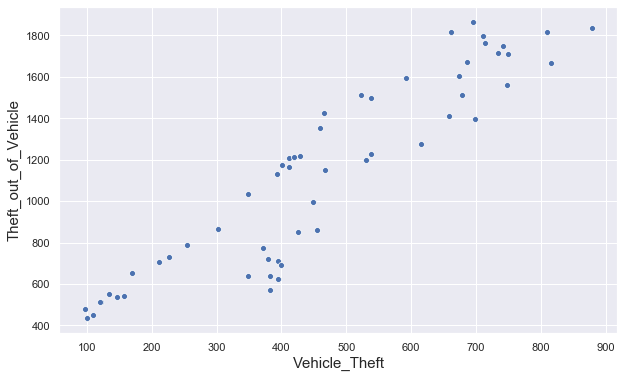

In [16]:
#Seaborn scatterplot
plt.figure(figsize=(10,6));
ax = sns.scatterplot(x='vehicle_theft', y='theft_out_of_vehicle', data=crime)
ax.set_ylabel('Theft_out_of_Vehicle', fontsize=15);

ax.set_xlabel('Vehicle_Theft', fontsize=15);

We can then create a simple plot of the vehicle theft and theft out of a vehicle to observe trends together over the entire time period.

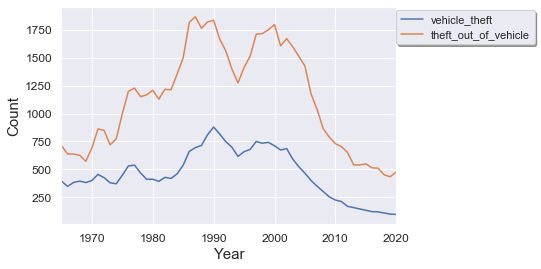

In [17]:

ax = sns.lineplot(x=crime.index, y='vehicle_theft', data=crime, label='vehicle_theft')
sns.lineplot(x=crime.index, y='theft_out_of_vehicle', data=crime, label='theft_out_of_vehicle')
ax.set_ylabel('Count', fontsize=15)

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.43, 1.01));


It seems like these two objects are highly correlated from 1965, when the Penal Code was entered into force.

It might be good to think about this before performing modeling if for example we wanted to create a linear regression model based on subcategories of data in order to predict the probability of when/where a crime might occur or what type of crime (classification problem), we would want to remove any duplicate information and simplify our model. 

As such, we are not privy to how the collection of these two types of crimes are done, i.e. are they actually happening at the same time and being recorded as two separate crimes, as in other criminal classifications. 

The same could be said for all other types as well, as we know for cases such as burglary and theft, e.g. if a person is reporting a burglary (unlawful entry to ones home) and also that they were victims of theft these crimes could be recorded as two separate events.

#### Another interesting insight is to look at the main categories (Chapters) contributing the most to the total number of crimes.

In [18]:
crime.sum() #sum of individual columns from all years.

pop                           4919
total_crimes                684142
total_penal_crimes          584270
total_life_and_health        32285
murder                         118
assault                      30328
total_sexual_offence          5398
rape                          1624
total_theft                 353170
burglary_no_guns             76938
burglary_home                11604
vehicle_theft                25735
theft_out_of_vehicle         63111
theft_shop                   29793
theft_aggravated              3508
fraud                        55603
criminal_damage              65571
total_other_penal_crimes     99498
narcotics                    29140
driving_under_influence      14072
dtype: int64

In [62]:
#Look at those crimes with highest sums. ignoring total_penal_crimes and total_other_penal_crimes
#Fraction of the cumulative sum of total_theft over total_crimes. 
#Ignoring sub-categories therein.
sum_total_theft = (crime['total_theft'].sum()/crime['total_crimes'].sum())*100

#Fraction of the cumulative sum of fraud over total_crimes
sum_fraud = (crime['fraud'].sum()/crime['total_crimes'].sum())*100

#Fraction of the cumulative sum of criminal_damage over total_crimes
sum_criminal_damage = (crime['criminal_damage'].sum()/crime['total_crimes'].sum())*100

#Fraction of the cumulative sum of total_life_and_health over total_crimes 
sum_life_and_health = (crime['total_life_and_health'].sum()/crime['total_crimes'].sum())*100

#Fraction of the cumulative sum of total_sexual_offence over total_crimes
sum_sexual_offences = (crime['total_sexual_offence'].sum()/crime['total_crimes'].sum())*100

#Fraction of the cumulative sum of narcotics over total_crimes
sum_narcotics = (crime['narcotics'].sum()/crime['total_crimes'].sum())*100

ch_summary = np.round(pd.DataFrame({
    'total_life_and_health':sum_life_and_health,
    'total_sexual_offence':sum_sexual_offences,
    'total_theft':sum_total_theft,
    'fraud':sum_fraud,
    'criminal_damage':sum_criminal_damage,
    'narcotics':sum_narcotics}, index=['% Total Crimes Sum']), decimals = 2)
ch_summary

,total_life_and_health,total_sexual_offence,total_theft,fraud,criminal_damage,narcotics
% Total Crimes Sum,4.72,0.79,51.62,8.13,9.58,4.26


In [20]:
#Create a df summarizing the three highest contributors to total crime 
#over the last ten years.

for x in crime['total_crimes'].loc[2000:]:
            criminal_damage_tot_crime = (crime['criminal_damage'].loc[2000:]/crime['total_crimes'].loc[2000:])*100

            fraud_tot_crimes = (crime['fraud'].loc[2000:]/crime['total_crimes'].loc[2000:])*100

            theft_tot_crimes = (crime['total_theft'].loc[2000:]/crime['total_crimes'].loc[2000:])*100
                
            criminal_damage_fraud_theft = (criminal_damage_tot_crime + fraud_tot_crimes + theft_tot_crimes)

annual_ch_summary = pd.DataFrame({
            'criminal_damage': criminal_damage_tot_crime,
            'fraud':fraud_tot_crimes,
            'total_theft':theft_tot_crimes,
            'criminal_damage_fraud_theft':criminal_damage_fraud_theft})

#Alternative to maths, just use styling on df: df.style.format("{:.2%}").
#ch_summary.style.set_table_attributes('style=display:inline').set_caption('Percentage of Total Crime')
print('Percentage of Total Crime Annualy 2000-2020')
display(annual_ch_summary.round(decimals = 2))

Percentage of Total Crime Annualy 2000-2020


,criminal_damage,fraud,total_theft,criminal_damage_fraud_theft
year,,,,
2000,10.17,4.15,57.93,72.25
2001,11.33,3.55,56.06,70.94
2002,11.37,3.52,55.61,70.49
2003,12.05,5.25,53.27,70.57
2004,11.79,4.62,52.20,68.61
2005,11.88,4.65,50.75,67.28
2006,12.06,4.69,47.57,64.33
2007,13.71,5.95,44.13,63.78
2008,14.16,7.14,40.61,61.91


## Total crime break down

We can see that most of the columns with the highest values (after total_crimes etc.) correlate to chapters within the penal code. Some are sections within a given chapter are also quite high as they represent the majority of that chapter.

We can construct a new dataframe which includes the chapters of the penal code present in our data, namely:

* Ch. 3 Crimes against life and health, of which Assault against women and men 18 yrs. and older is the most common. total_life_and_health represents 4.7% of the cumulative sum of total_crimes.

* Ch. 6 Sexual offences, of which rape (§ 1,4) and sexual molestation (§ 10) are highest. total_sexual_offence represents 0.8% of the cumulative sum of total_crimes.

* Ch. 8 Theft, robbery, other offences of stealing, of which electric bicycle theft, burglary of private dwellings, summer homes etc., theft from out of a vehicle, theft from shops, department stores, etc are the highest instances. total_theft represents 52% of the cumulative sum of total_crimes.

* Ch. 9 Fraud and other acts of dishonesty, of which Payment card fraud is the highest. Fraud represents 8.1% of the cumulative sum of total_crimes.

* Ch. 12 Criminal damage,  of which the graffiti represents approximatly half of the total crimes. criminal_damage represents 9.6% of the cumulative sum of total_crimes.

* Narcotics, represents 4.2% of the cumulative sum of total_crimes.


Note: 
Clearly, total_theft has the highest influence on the development of crime overtime with criminal_damage and fraud following.

While, Chapter 6, total_sexual_offence is low relative to the other offences, we will still include it in our new df for initial comparison. Narcotics and DUI represent independent sections of the penal code and are not assigned a chapter number, but are not included elsewhere in our dataset (outside of total_other_penal_crimes). While Narcotics includes the total crimes against the Narcotics Drugs Act, DUI does not encompase all crimes listed under the Crimes Against the Road Traffic Offences Act, the majority of which is Unlawful driving (§ 3), and thus we will not include it in our new dataframe.


In [21]:
ch_crime = crime.loc[:,['total_life_and_health', 'total_sexual_offence', 'total_theft', 'fraud', 'criminal_damage', 'narcotics']]

ch_crime.head()

,total_life_and_health,total_sexual_offence,total_theft,fraud,criminal_damage,narcotics
year,,,,,,
1965,166,51,3676,429,296,9
1966,183,47,3719,527,286,13
1967,188,49,3927,546,313,51
1968,228,47,4230,799,363,100
1969,240,42,4124,678,374,549


In [22]:
ch_crime.iplot()

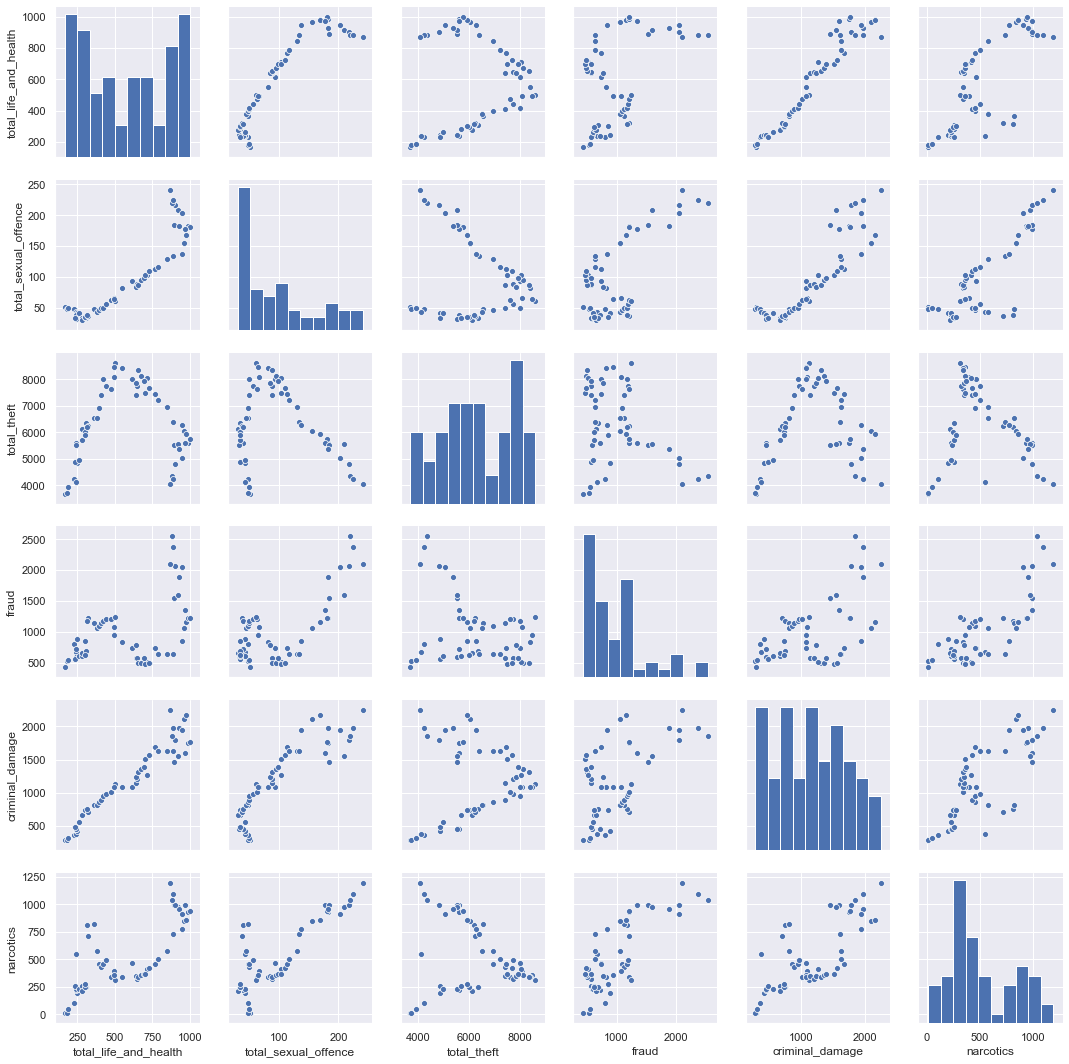

In [23]:
#We can create a pairgrid'of our new df.
sns.pairplot(data=ch_crime)

#### We can see a strong linear correlation between total_life_and_health crimes with criminal_damage and with total_sexual_offences. Let's look at a correlation plot.

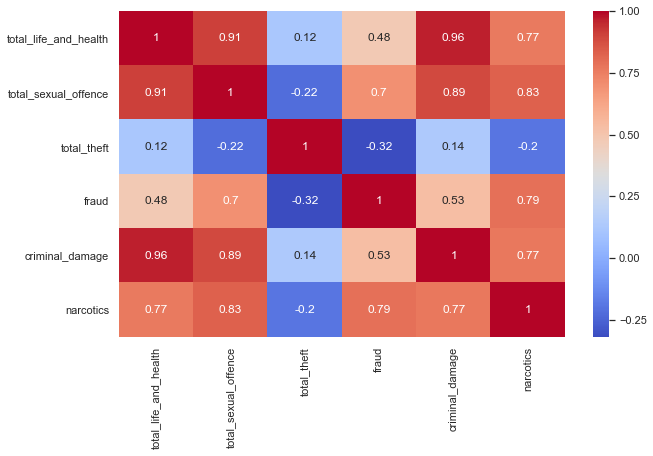

In [24]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(ch_crime.corr(),annot=True,cmap='coolwarm', annot_kws={'size':12})
plt.ylim(6, 0);

#### Here we see quite a high correlation between total_life_and_health crimes and criminal_damage (0.96), and total_life_and_health with total_sexual_offence (0.91).

We can first attempt to interpret the relationship between total_life_and_health and total_sexual_offence. Using statistics from **2020** i.e. the raw data, gathered by Brå *Ref. 1*. 

**total_life_and_health**
* For *2020*, we note that for *Crimes against life and health* **Ch. 3**, the majority of crimes reported are *assault* at 92 %. 
* Within *assault* we see that *assault against women* is 35 % and *assault against men* is 35 % for *persons 18 years and older*. 

* In each category of *assault* of either men or women 18 years or older we have two different cases. Perpetrators assaulting women are mostly an *Intimate partner* 47% or someone known to the victim 34 %. Whereas for men, reported assault from a *Perpetrator unknown to the victim* is slightly more common at 55%. 

* *Assault against women 18 years or older* is **32 %** of the total crimes *life_and_health*, and similarly for men at **33 %**. Whereas, *Assault against girls* and *boys* (under 15) represent **8 %** and **12 %** of total_sexual_offences, respectively.



**total_sexual_offences**
* For *Sexual offences* **Ch. 6**, we see that *rape* 37% and *sexual molestation* 41% are the most reported cases. 

rape
* *Assault against women 18 years or older* is 51 % of *rape* and **19%** of total_sexual_offences. Furthermore, of those crimes reported as *assault against women 18 years or older*, 33 % are listed as an *Intimate partner*, and 38 % as *Other perpetrator known to the victim*. 

* *Assault against men 18 years or older* represents only 3% of *rape* and **1 %** of total_sexual_offences. 

* Whereas, rape *Against girls under 15 years* represents **10 %** of total_sexual_offences.

sexual molestation
* 50 % of cases under *Sexual molestation* are *against women 18 years or older*, the majority of which (67%) are a *Perpetrator unknown to the victim*. These cases make up a total of **20 %** of total_sexual_offences. 

* For crimes *Against men 18 years or older*, we have only **2 %** of total_sexual_offences.

* Whereas, *Sexual molestation* categorized as *Against girls under 15 years* represents **10 %** of total_sexual_offences.

* Whereas, *Sexual molestation* categorized as *Against boys under 15 years* represents **2 %** of total_sexual_offences.

The correlation between *total_life_and_health crimes* and *total_sexual_offence* covered under **Ch. 3** and **Ch. 6** respectively is thus made more clear. The majority of crimes in Ch. 3 are assault, particularly, assault against women 18 yrs and older, and within Ch. 6 they are rape and sexual molestation, particularly against women 18 yrs and older in both sections. As it is defined in the Penal Code *Ref. 2*, assault is the infliction of bodily harm on a person, and the act of rape is considered when a participation is a result of assault or other violence. Therefore, we might conclude that asssault cases covered in Ch. 3 and Ch. 6 may be reported both as assault and rape, but only in cases where women and girls are concerned.

**criminal_damage**
* For *Criminal damage* **Ch. 12** we note that *Graffiti* crimes are the highest, representing 48 % of Ch. 12. After this, crimes *Against the state, local authority, county council (not graffiti), *Other damage (not graffiti) and damage *on motor vehicles (not through fire)* follow with 50% of *Criminal damage*.

There is no clear correlation in terms of classification of crimes, which we can see between criminal_damage and total_life_and_health, we can only see that they both have an upwards trend from the beginning of our data set.

*References:* 
1. To see the full statistics on reported crimes for each section of the Swedish criminal code from 2008 - 2020: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences Under Reported offences select -> download tables -> period -> year.

2. English translation of the Swedish Criminal Code. https://www.government.se/press-releases/2020/01/an-up-to-date-english-translation-of-the-swedish-criminal-code/

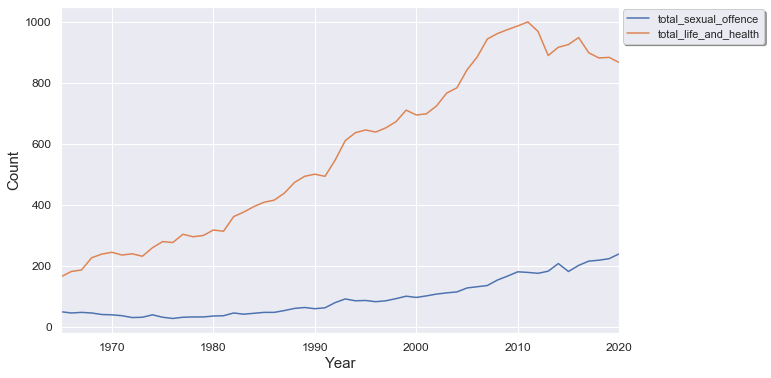

In [25]:
#Create a simple plot of the total_life_and_health and total_sexual_offences over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='total_sexual_offence', data=crime, label='total_sexual_offence')
sns.lineplot(x=crime.index, y='total_life_and_health', data=crime, label='total_life_and_health')
ax.set_ylabel('Count', fontsize=15)

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.27, 1.01));


Here we see that total life and health crimes are higher than total sexual offences reported, but they do follow a somewhat similar trend, until, that is, 2010, where total life and health crimes seems to begin to decrease. 

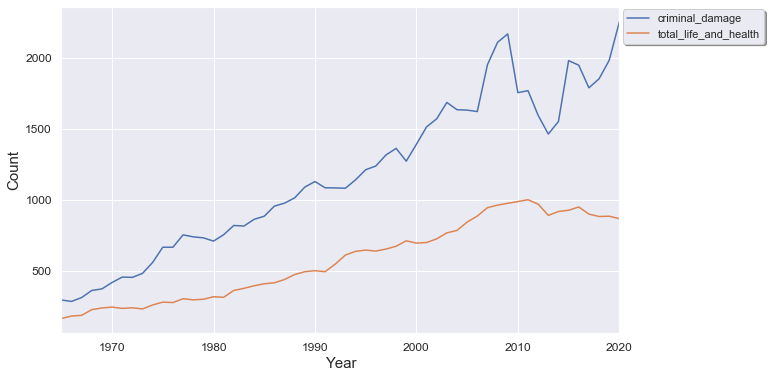

In [26]:
#Create a simple plot of the total_life_and_health and criminal_damage over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='criminal_damage', data=crime, label='criminal_damage')
sns.lineplot(x=crime.index, y='total_life_and_health', data=crime, label='total_life_and_health')
ax.set_ylabel('Count', fontsize=15)

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.27, 1.01));


Interestingly, we see a strong upwards trend for both, until late 2000's, when criminal_damage starts to fluctuate widely just before 2010, when total_life_and_health crimes start to slow and then decrease. Overall, the trends appear to be non-linear.


# Model Selection

In order to model the trends and attempt to accuratly predict the forthcoming years, we must first understand our data, how it can be prepared, computational efficiency, and the performance metrics used when applying either classical or machine learning techniques. 

In our understanding of whether or not an ML approach to time-series forcasting is appropriate, we should create a benchmark for perfomance as research suggests. 



> ...applications in the field of forecasting and a considerable amount of research has been conducted on how a special class of it, utilizing Machine Learning methods (ML) and especially Neural Networks (NNs), can be exploited to improve time series predictions. ...limited objective evidence is available regarding their relative performance as a standard forecasting tool. Their superiority claims are characterized by the following three major limitations:

> * Their conclusions are based on a few, or even a single time series, raising questions about the statistical significance of the results and their generalization.
> * The methods are evaluated for short-term forecasting horizons, often one-step-ahead, not considering medium and long-term ones.
> * No benchmarks are used to compare the accuracy of ML methods versus alternative ones.

Reference:  *Makridakis S, Spiliotis E, Assimakopoulos V (2018) Statistical and Machine Learning forecasting methods: Concerns and ways forward. PLoS ONE 13(3): e0194889. https://doi.org/10.1371/journal.pone.0194889*

See further:
https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/


In an effort to compare to simpler classical models, I will show the forecasting capabilities of two methods, Simple Exponential Smoothing (SES) and Holt's Method, and extension of SES. 

## Total Crimes forecasting 

We can create a new data frame in order to simplify the models. We start with looking simply at the total crime over the entire time period. 

In [27]:
#Create a sub-df which looks at only total crimes. 
total_crime = crime.loc[:,['total_crimes']]
total_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1965 to 2020
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_crimes  56 non-null     int64
dtypes: int64(1)
memory usage: 2.9 KB


In [28]:
total_crime.head()

,total_crimes
year,
1965,5772
1966,6036
1967,6401
1968,7150
1969,7637


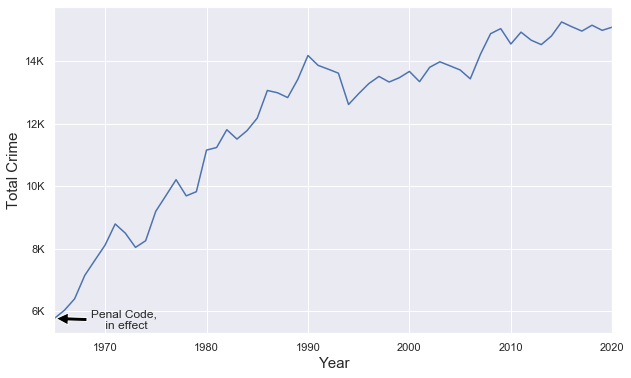

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

#ax.set_title('Total Crime', fontsize=16)
ax = sns.lineplot(x=total_crime.index, y='total_crimes', data = total_crime, sort = False)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Total Crime', fontsize=15)

ax.set_xlim(1965,2020)
ax.set_xlabel('Year', fontsize=15)

#Add a callout with an arrow.
ax.annotate("Penal Code,\n in effect", xy=(1965, 5772),  xycoords='data',
            xytext=(70, -10), textcoords='offset points',size=12, ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05)) #Note: arrowstyle and face color are not compatible in this plot.

#ax.annotate("GPS began", xy=(1990, 12000),  xycoords='data',
#            xytext=(50, -60), textcoords='offset points',size=12, ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.05)) #Note: arrowstyle and face color are not compatible in this plot.

#ax.annotate("EU dir anti-theft in cars", xy=(1998, 12000),  xycoords='data',
#            xytext=(100, -60), textcoords='offset points',size=12, ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.08)) #Note: arrowstyle and face color are not compatible in this plot.

plt.show()

#Check out more fun labeling tips here: https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate


## Exponential Smoothing

Single Exponential Smoothing or Simple Exponential Smoothing (SES), can be used for time series forecasting on univariate data, which may not have a clear trend or seasonal time component. Simply: 

$$ \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha)y_{T-1} + \alpha(1-\alpha)^2y_{T-2} + \cdots, $$

where $ T + 1 $ is one step forward forecast in time, which carries a weighted average of the entire data set at that given timepoint (1).

SES utilizes the smoothing coefficient, $ \alpha $, as the parameter of interest. The smoothing coefficient ranges between 0 and 1, and controls the rate of exponential decay of the weighted average, from the current (most recent) time point and backwards in time. With a larger $ \alpha $, the model places more weight on the most recent time point, while with a smaller $ \alpha $ the model will have a more gentle decay. 

In component form simple exponential smooting can be broken into two equations (1): 

$$
\begin{align*}
\text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_t \\
\text{Smoothing equation} && \ell_t & = \alpha y_t + (1 - \alpha)\ell_{t-1} ,
\end{align*}
$$


where $\ell_t $ is the level (smoothed value) of the time series at time $ t $. $ h = 1 $ yields the fit, $ t = T $ yields the forecasts.

The forecast function for simple exponential smoothing is only appropriate for data which lacks a trend and seasonal component. It is flat, such that all forecasts will have the same value as the first prediction (the level component) after the fitted data (1).

$$ \hat{y}_{T+h|T} = \hat{y}_{T+1|T} = \ell_T, \qquad h = 2, 3, \cdots $$


Reference: 
1) https://otexts.com/fpp2/ses.html For a mathematical derevation of the method.

2) https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html?highlight=box%20cox Describing detailed examples which I have used as a guide below.


From the plot above, we do not see a clear trend. We also have no clear seasonality in our data. Thus, we can assume that the simplist of these, SES is the best option to begin with. We can then proceed with another method for modeling our data, namely Holt's method with exponential smoothing and dampening parameters.

In [30]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [31]:
#Convert index to date_time object! #Use new index for our crime df in order to use SimpleExpSmoothing model.
crime_ses = crime.copy() #create a copy, which will not affect the original df!
crime_ses.index = pd.date_range('1965-12-31', periods=56, freq='Y')
#It is only advantageuous when using decomposition and fitting method.
#Data is reported for YE, so we want to preserve that in our dt element.

In [32]:
crime_ses.head()

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
1965-12-31,78,5772,5065,166,3,150,51,8,3676,1037,98,395,713,123,12,429,296,707,9,212
1966-12-31,78,6036,5239,183,2,166,47,8,3719,1027,104,348,638,167,14,527,286,797,13,217
1967-12-31,79,6401,5537,188,2,172,49,8,3927,1083,108,383,637,204,13,546,313,864,51,228
1968-12-31,79,7150,6228,228,1,212,47,8,4230,1229,114,395,626,291,15,799,363,922,100,201
1969-12-31,80,7637,6009,240,1,222,42,8,4124,1126,116,382,572,254,16,678,374,1628,549,230


In [33]:
#Create a sub-df which looks at only total crimes column in our df. 
total_crime_ses = crime_ses.loc[:,['total_crimes']]
total_crime_ses.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 1965-12-31 to 2020-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_crimes  56 non-null     int64
dtypes: int64(1)
memory usage: 896.0 bytes


In [34]:
total_crime_ses.head()

,total_crimes
1965-12-31,5772
1966-12-31,6036
1967-12-31,6401
1968-12-31,7150
1969-12-31,7637


In [35]:
test_size=11 #set up test size about 20% of the total data.
test_ind = len(total_crime_ses)-test_size #set up interval between test/train data


In [36]:
train_ses = total_crime_ses.iloc[:test_ind] #training data will be dates before and including 2009
test_ses = total_crime_ses.iloc[test_ind:] #test data will be dates after 2009, i.e. from the test interval to the end.


In [37]:
#test_ses
len(test_ses)

11

In [38]:
test_ses

,total_crimes
2010-12-31,14555
2011-12-31,14935
2012-12-31,14678
2013-12-31,14536
2014-12-31,14812
2015-12-31,15261
2016-12-31,15109
2017-12-31,14969
2018-12-31,15157
2019-12-31,14993


In [46]:
%%time
#initial level l defaults to None if not selected, initialization method is selected based on whether or not we set our parameters in the fit.
# we can choose alpha and initialize accordingly, or allow the model to
#find the best fit with alpha as a free parameter.
f_length = 14
fit1 = SimpleExpSmoothing(train_ses, initialization_method='heuristic').fit(smoothing_level=0.1, optimized=False) #selecting alpha = 0.1
fcast1 = fit1.forecast(f_length).rename(r'$\alpha=0.1$') #using fitted training data to forecast over test data range and predict 3 years beyond

fit2 = SimpleExpSmoothing(train_ses, initialization_method='heuristic').fit(smoothing_level=0.5, optimized=False) #selecting alpha = 0.5
fcast2 = fit2.forecast(f_length).rename(r'$\alpha=0.5$') #using fitted training data to forecast over test data range and predict 3 years beyond

fit3 = SimpleExpSmoothing(train_ses, initialization_method='estimated').fit() #selecting alpha to be free parameter for model optimization
fcast3 = fit3.forecast(f_length).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level']) #using fitted training data to forecast over test data range and predict 3 years beyond


CPU times: user 21.3 ms, sys: 1.36 ms, total: 22.6 ms
Wall time: 21.6 ms


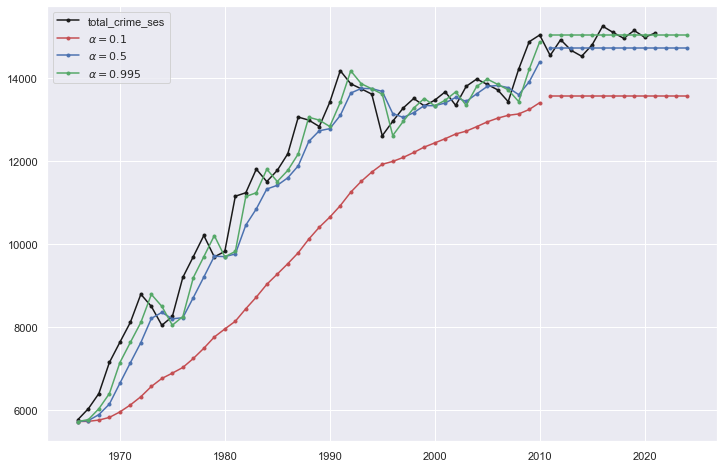

In [47]:
plt.figure(figsize=(12, 8))
line0, = plt.plot(total_crime_ses, 'k.-')
plt.plot(fit1.fittedvalues, 'r.-')
line1, = plt.plot(fcast1, 'r.-')
plt.plot(fit2.fittedvalues, 'b.-')
line2, = plt.plot(fcast2, 'b.-')
plt.plot(fit3.fittedvalues, 'g.-')
line3, = plt.plot(fcast3, 'g.-')
plt.legend([line0,line1, line2, line3], ['total_crime_ses', fcast1.name, fcast2.name, fcast3.name])


From the plot, we can quickly see that higher values for $ \alpha $ increase the accuracy of the fit. Let's look into our key error metrics to get more details.

In [48]:
#print(fit1.summary())


In [92]:
#Calculate the residual mean and std dev for a given fit using Simple Exponential Smoothing.
fcast1_test_err = test_ses['total_crimes'] - fcast1[:test_size]
fcast2_test_err = test_ses['total_crimes'] - fcast2[:test_size]
fcast3_test_err = test_ses['total_crimes'] - fcast3[:test_size]

errors_mean1 = fcast1_test_err.mean()
errors_std1 = fcast1_test_err.std()
errors_mean2 = fcast2_test_err.mean()
errors_std2 = fcast2_test_err.std()
errors_mean3 = fcast3_test_err.mean()
errors_std3 = fcast3_test_err.std()

ses_resd = np.round(pd.DataFrame({'Residual mean': (errors_mean1, errors_mean2, errors_mean3),
                    'Residual std deviation': (errors_std1, errors_std2, errors_std3), 
                    r'$\alpha$': (0.1, 0.5, fit3.model.params['smoothing_level'])}, index=['fit 1', 'fit 2', 'fit 3']), decimals = 3)
ses_resd

,Residual mean,Residual std deviation,$\alpha$
fit 1,1339.209,244.536,0.100
fit 2,193.297,244.536,0.500
fit 3,-128.901,244.536,0.995


In [94]:
#Calculate key error metrics for forecasts, with a given alpha, using Simple Exponential Smoothing.

MAPE_fit1 = np.mean(abs(fcast1_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_fit1 = np.mean(abs(fcast1_test_err))
MSE_fit1 = np.mean(np.square(fcast1_test_err))
RMSE_fit1 = np.sqrt(MSE_fit1)

MAPE_fit2 = np.mean(abs(fcast2_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_fit2 = np.mean(abs(fcast2_test_err))
MSE_fit2 = np.mean(np.square(fcast2_test_err))
RMSE_fit2 = np.sqrt(MSE_fit2)

MAPE_fit3 = np.mean(abs(fcast3_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_fit3 = np.mean(abs(fcast3_test_err))
MSE_fit3 = np.mean(np.square(fcast3_test_err))
RMSE_fit3 = np.sqrt(MSE_fit3)


ses_error = np.round(pd.DataFrame({r'$\alpha$': (0.1, 0.5, fit3.model.params['smoothing_level']),
                      'MAPE': (MAPE_fit1, MAPE_fit2, MAPE_fit3),
                      'MAE': (MAE_fit1, MAE_fit2, MAE_fit3),
                      'MSE': (MSE_fit1, MSE_fit2, MSE_fit3),
                      'RMSE': (RMSE_fit1, RMSE_fit2, RMSE_fit3)
                      }, index=['fit 1', 'fit 2', 'fit 3']), decimals=2)

ses_error

,$\alpha$,MAPE,MAE,MSE,RMSE
fit 1,0.1,0.64,1339.21,1847841.28,1359.35
fit 2,0.5,0.13,267.10,91725.31,302.86
fit 3,1.0,0.10,207.87,70977.04,266.42


As we can see, the predictions using $ \alpha ≥ 0.5 $ perform better in terms of fitting our data and in forecasting. For the case, where we allow the SES model to optimize alpha, we have a more accurate fit. 

As for all forecasting methods, the predictions become worse the further we attempt to predict in time. Here, the forecast on test data follows a constant 'flat' projection in time, which may diverge from the real outcomes in the following years. 

Perhaps the most important to note is that our performance, in terms of model fitting and predictions, can be highly dependent on where we create our split for training and test data. This would indicate that our model is not robust and the method of SES is not ideal for this data set or that our data set will need to be modified, i.e. shortened focusing on more recent decades of crime, with a look instead at the monthly crime statistics annually.

## Holt's Method
Here we try another example of exponential smoothing, the so called Holt's Method (or Double Exponential Smoothing). In this model, we compare model differences in the trend, either linear or exponential, by choosing either additive or multiplicative method.  We extend the model using two additional parameters, $ \beta $, which is a smoothing parameter for the trend and $ \phi $, which is a dampening parameter. See details in Reference 1. 

References: 
1) https://otexts.com/fpp2/holt.html Describing the mathematics behind the model.

2) https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html Describing detailed examples which I have used as a guide below.


Here we will compare Holt's method by selecting a smoothing_level, $ \alpha = 0.2 $ and smoothing_trend $ \beta = 0.1 $. See note in Error Discussion below.

We will create a model with linear and exponential method for each of the fits and not allow for dampening. 

We will then create a model with an additive damped trend and allow for model dampening.


CPU times: user 68.8 ms, sys: 3.52 ms, total: 72.3 ms
Wall time: 71.8 ms


/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



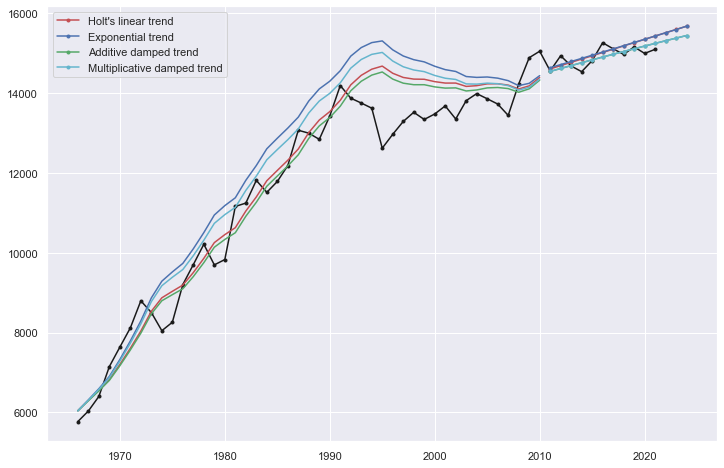

In [74]:
%%time

f_length = 14
fit4 = Holt(train_ses, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
fcast4 = fit4.forecast(f_length).rename("Holt's linear trend")

fit5 = Holt(train_ses, exponential=True, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
fcast5 = fit5.forecast(f_length).rename("Exponential trend")

fit6 = Holt(train_ses, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.1)
fcast6 = fit6.forecast(f_length).rename("Additive damped trend")

fit7 = Holt(train_ses, exponential=True, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.1)
fcast7 = fit7.forecast(f_length).rename("Multiplicative damped trend")

plt.figure(figsize=(12, 8))
plt.plot(total_crime_ses,  'k.-')

plt.plot(fit4.fittedvalues, 'r-')
line1, = plt.plot(fcast4, 'r.-')

plt.plot(fit5.fittedvalues, 'b-')
line2, = plt.plot(fcast5, 'b.-')

plt.plot(fit6.fittedvalues, 'g-')
line3, = plt.plot(fcast6, 'g.-')

plt.plot(fit7.fittedvalues, 'c-')
line4, = plt.plot(fcast6, 'c.-')

plt.legend([line1, line2, line3, line4], [fcast4.name, fcast5.name, fcast6.name, fcast7.name])

From our plot above, we can see that Holt's Linear or Additive damped trend perform best in both fitting the training data, while multiplicative damped seems to perform best in predicting or forecasting over the period given in the test data. We note that the linear, exponential and additive damped trend give quite similar predictions to our test data. 

Let's now look at our key error metrics. 

In [95]:
#taking only forecast data which aligns with our test data (i.e. 2010 up to year = 2020) to identify errors.
fcast4_test_err = test_ses['total_crimes'] - fcast4[:test_size]
fcast5_test_err = test_ses['total_crimes'] - fcast5[:test_size]
fcast6_test_err = test_ses['total_crimes'] - fcast6[:test_size]
fcast7_test_err = test_ses['total_crimes'] - fcast7[:test_size]

In [96]:
#Calculate key error metrics
MAPE_linear = np.mean(abs(fcast4_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_linear = np.mean(abs(fcast4_test_err))
MSE_linear = np.mean(np.square(fcast4_test_err))
RMSE_linear = np.sqrt(MSE_linear)

MAPE_exponential = np.mean(abs(fcast5_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_exponential = np.mean(abs(fcast5_test_err))
MSE_exponential = np.mean(np.square(fcast5_test_err))
RMSE_exponential = np.sqrt(MSE_exponential)

MAPE_additive_damped = np.mean(abs(fcast6_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_additive_damped = np.mean(abs(fcast6_test_err))
MSE_additive_damped = np.mean(np.square(fcast6_test_err))
RMSE_additive_damped = np.sqrt(MSE_additive_damped)

MAPE_multiplicative_damped = np.mean(abs(fcast7_test_err/test_ses['total_crimes']))*(100/f_length)
MAE_multiplicative_damped = np.mean(abs(fcast7_test_err))
MSE_multiplicative_damped = np.mean(np.square(fcast7_test_err))
RMSE_multiplicative_damped = np.sqrt(MSE_multiplicative_damped)

holt_error = np.round(pd.DataFrame({
                    'MAPE': (MAPE_linear, MAPE_exponential, MAPE_additive_damped, MAPE_multiplicative_damped),
                    'MAE': (MAE_linear, MAE_exponential, MAE_additive_damped, MAE_multiplicative_damped),
                    'MSE': (MSE_linear, MSE_exponential, MSE_additive_damped, MSE_multiplicative_damped),
                    'RMSE': (RMSE_linear, RMSE_exponential, RMSE_additive_damped, RMSE_multiplicative_damped)
                    }, index=['linear', 'exponential', 'additive_damped', 'multiplicative_damped']), decimals=2)

holt_error

,MAPE,MAE,MSE,RMSE
linear,0.09,189.59,48914.62,221.17
exponential,0.09,194.08,49828.19,223.22
additive_damped,0.07,139.48,33094.49,181.92
multiplicative_damped,0.06,135.19,32591.76,180.53


### Error Discussion 
Evaluating our models with the above performance metrics, we can see that indeed, Holt's additive and multiplicative damped methods perform the best under the conditions where $ \alpha = 0.2 $ and  $ \beta = 0.1 $

NOTE: I have chosen different hyper parameter values to find the best case for all models in terms of prediction, but I have not done a grid search in this case. (See: https://www.zhengwenjie.net/tscv/ for possibility to do cross validation in python for time series). However, I have noted that even a small change of 0.1-0.2 in $ \alpha $ or $ \beta $ leads to very large error. Upon removing the selected values for our parameters $ \alpha = 0.2 $ and $ \beta = 0.1 $, and letting the model select the paramters, we find that the fit of our training data is excellent, however, the forecasting is quite poor, and errors increase by an order of magnitude. 

While the above method is quite ok for forecasting in cases where we can split and compare to test data set, we may have difficulties in finding accurate future predictions. When we look at the possible trend of the data set after 2010, it seems that the test data is flattening out and not increasing, while our forecast data is increasing linearly. 


### *We can now move on to modeling using a popular machine learning model, the long-short term memory model. But first we must transform our non-linear data set.*

## Log Transformation

### Transformation of non-linear data

>The simplest way of modelling a nonlinear relationship is to transform the forecast variable y and/or the predictor variable x before estimating a regression model. While this provides a non-linear functional form, the model is still linear in the parameters. The most commonly used transformation is the (natural) logarithm.

Reference: https://otexts.com/fpp2/nonlinear-regression.html


In order to select the correct type of model we must look into the type of data that we have. 
See this helpful reference: https://otexts.com/fpp2/tspatterns.html

From the plot of our data, it looks like we have a nonlinear trend. Thus it could be wise to first start with such a regression method for forecasting. 

Instead of higher order terms, e.g. quadradic functions, $$x_1,t = t^1, x_2,t = t^2 ...$$ 

We can use a piece-wise linear function which can 'bend' or change direction over time:

$$ x_1,t = t $$

$$ x_2,t = (t-\tau)_+ = \left\{ 
                            \begin{array}\\ 
                                0 & t <\tau \\
                                (t-\tau) & t ≥ \tau \\
                            \end{array}
                        \right.$$


Reference: https://otexts.com/fpp2/nonlinear-regression.html




> If we assume an additive decomposition, then we can write
>                        $$ y_t=S_t+T_t+R_t $$
>where $ y_t $ is the data, $ S_t $ is the seasonal component, $ T_t $ is the trend-cycle component, and $ R_t $ is the remainder component, all at period $ t. $ Alternatively, a multiplicative decomposition would be written as
>                        $$ y_t=S_t×T_t×R_t. $$ 

>The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

>An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition because
>            $$ y_t=S_t×T_t×R_t $$ is equivalent to $$ logy_t=logS_t+logT_t+logR_t. $$
            
Reference: https://otexts.com/fpp2/components.html


In [132]:
#Using log transformation

total_crime_log = total_crime_ses.copy() #make copy
total_crime_log = np.log(total_crime_log) # take natural log of df

#Rename column
total_crime_log.rename(columns = {'total_crimes':'total_crimes_log'}, inplace = True)

total_crime_log.head()


,total_crimes_log
1965-12-31,8.660774
1966-12-31,8.705497
1967-12-31,8.764210
1968-12-31,8.874868
1969-12-31,8.940760


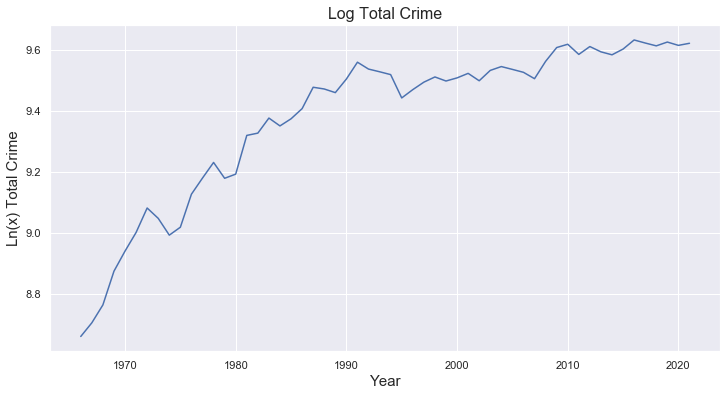

In [133]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Log Total Crime', fontsize=16)
ax = sns.lineplot(x=total_crime_log.index, y='total_crimes_log', data = total_crime_log, sort = False)
ax.set_ylabel('Ln(x) Total Crime', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

plt.show()


## Train Test Split

We must decide where we will split the data in order to perform our train test split. For the above data we have a time series that spans over decades, therefore our splitting should be over a portion of these years, typically test data is 20-30% of the data set. 

* We can point to certain dramatic shifts in the data trend, based on the modernization of the Penal Code, monitoring and reporting.  

Because, I do not know details on how the police have changed their reporting (need to do more research and possible interviews) I can instead focus on legal changes and historical information.

* The Penal Code came in to effect, namely from 1965. From there I can look at major changes in the Penal Code and how this might have affected the trends in crime, e.g. when the blood alcohol content minimum threshold was changed for DUI, when using narcotics became illegal to use and posses and when police forces were increased, or when the definition of rape was reclassified. The change in individuals reporting crimes over time, based on their confidence in the police and criminal justice system.

If I want to focus on a particular aspect of crime, then I can start to break up the timeline e.g. to model after modern surveilence was implemented in and around homes, private shops, municipal buildings, and other businesses or when cars were required to have certain security features like alarms or tracking devices. 

* For example, while the technology of CCTV has been around for some time, the major breakthrough in surveillance was during the 1990s when digital multiplexing was developed, allowing the recording of several cameras at once, including time-lapse and motion detection.


* This likely led to a change from a largely upwards trend to a downwards trend in burglaries, and may have affected other crimes such as those listed as criminal_damage.
Source: https://en.wikipedia.org/wiki/Closed-circuit_television

Thus we can see that it is most benefitial to understand key historical changes which may affect the data and which could give information about why changes in trends take place.

For simplicity, we will keep all the data. In a future model, I will show the analysis with monthly data for years from 2008-2020.


#  


We can perform train test split as in our SES and Holt's models, selecting 20% of data for the test data.

By segmenting the data we avoid data leakage, which affects our model performance on new data. We do not want to train on test data!

In [442]:
test_size=11 #set up test size about 20% of the total data.

test_ind = len(total_crime_log)-test_size #set up interval between test/train data

In [443]:
train = total_crime_log.iloc[:test_ind] #training data will be dates before 2009

test = total_crime_log.iloc[test_ind:] #test data will be dates after 2009, i.e. from the test interval to the end.


In [444]:
#train
len(train)

45

In [445]:
test
#len(test)

,total_crimes_log
2010-12-31,9.585690
2011-12-31,9.611463
2012-12-31,9.594105
2013-12-31,9.584384
2014-12-31,9.603193
2015-12-31,9.633056
2016-12-31,9.623046
2017-12-31,9.613737
2018-12-31,9.626218
2019-12-31,9.615339


## Imports and scaling
We need to import the packages if we have not already done so above. We then define our scaler.


### LSTM

The Long Short-Term Model (LSTM) is a form of Recurrent Neural Network (RNN), which can provide information to the weights of the model over a longer range as it moves forward, thus information which was presented several time steps behind could be used to influence the current weights, and not just at a single time step forward as in traditional models. 

### Purpose
Due to the fact that we have a non-linear data set, with no seasonality, we will try to use LSTM to see if the performance is better than the classical models we used above. This is not an exaustive search, but simple application of LSTM.

### Main usage

The LSTM is most commonly used to deal with the vanishing gradient problem in RNNs, and can be applied to a variety of data, including images, text and time series.

### References
* https://direct.mit.edu/neco/article-abstract/9/8/1735/6109/Long-Short-Term-Memory?redirectedFrom=fulltext Original article on LSTM (1997).
* https://en.wikipedia.org/wiki/Long_short-term_memory

In [446]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [447]:
#Introduce  MinMaxScaler in order to scale the data.
scaler = MinMaxScaler()
#fit the scaler to the training dataset only.
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [448]:
#We now transform both test and training data with scaler separately.
#We want to have scaled train for our model training and scaled test for 
#our validation data.
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#### Time Series Generator

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

We need to define the length of our generator such that it is less than the test size, in order to predict one year out. We can feed a smaller batch and get out a batch of equal length. 

We can choose 9 years for the length giving us batches over which we can make our predictions.

In [449]:
length = 6 #look at stabilization here and later when we use 9 as length.
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length)

In [450]:
X,y = generator[0]

len(X[0])

6

## Creating the model

We are only using one feature in our time series, which is total_crime. We start by instantiating our model and then adding the layers. 

We start with long short-term memory model with 100 neurons. We select the rectified linear activation function 'relu'.

> a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

* https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

We add in one Dense layer because our data set is relatively small. 

Finally, we compile the model using 'adam' optimizer to update weights in our network, and mean square error to monitor the error in our loss function becuase we have a continuous function and the distribution of the variable is semi-gaussian.

* https://arxiv.org/abs/1412.6980 Original article describing Adam.

* https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ Overview of use of Adam in deep learning.

* https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ Loss functions in deep learning.

* https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0 Loss functions.

Afterwards, we can get a model summary our neural network.

In [451]:
n_feature = 1

model = Sequential()

model.add(LSTM(100, activation='relu',input_shape=(length, n_feature)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## Monitoring

Next, we set up our early stopping, and monitor our model for overfitting by looking at the vaildation data, i.e. the test data. We set a patience of 5, which controls the limit for how long the model will look for a stable minimum before stopping, this is done to avoid overfitting.

Reference: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

ModelCheckpoint
It could be beneficial to know at which point the model reaches a loss minimum according to some baseline that you are interested in. In that case, one should include the model checkpoint callback in order to identify and save the best model observed during training.

In [452]:
my_callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                ModelCheckpoint("checkpoint.h5", save_best_only=True)]

Next we set up our validation generator. This uses so called validation data (data from our test set) which will be included when fitting the training data. It is not used in training the model, but as a validation in the performance of the model after each epoch.


In [453]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length = length)

## Fitting the Model

Finally, we can fit our model with our training data. We add in early stopping and validation data check. We start with 30 epochs, but probably only need a few as the data is quite small.

#### Reference https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [454]:
%%time
model.fit_generator(generator,epochs=30,
                   validation_data = validation_generator,
                   callbacks=my_callbacks)

Epoch 1/30
1/1 [==============================] - 0s 188ms/step - loss: 0.5735 - val_loss: 0.8713
Epoch 2/30
1/1 [==============================] - 0s 166ms/step - loss: 0.5500 - val_loss: 0.8343
Epoch 3/30
1/1 [==============================] - 0s 170ms/step - loss: 0.5265 - val_loss: 0.7975
Epoch 4/30
1/1 [==============================] - 0s 160ms/step - loss: 0.5033 - val_loss: 0.7612
Epoch 5/30
1/1 [==============================] - 0s 164ms/step - loss: 0.4804 - val_loss: 0.7257
Epoch 6/30
1/1 [==============================] - 0s 169ms/step - loss: 0.4580 - val_loss: 0.6911
Epoch 7/30
1/1 [==============================] - 0s 167ms/step - loss: 0.4363 - val_loss: 0.6571
Epoch 8/30
1/1 [==============================] - 0s 159ms/step - loss: 0.4150 - val_loss: 0.6234
Epoch 9/30
1/1 [==============================] - 0s 175ms/step - loss: 0.3938 - val_loss: 0.5901
Epoch 10/30
1/1 [==============================] - 0s 156ms/step - loss: 0.3729 - val_loss: 0.5569
Epoch 11/30
1/1 [==

## Loss evaluation 

We can now look at how our loss compares to the validation data. 
We expect that loss should decrease with validation data loss, and we would like to find the point at which validation loss starts to increase, so we have a stopping point in number of epochs we need before over fitting.

In [455]:
losses = pd.DataFrame(model.history.history)

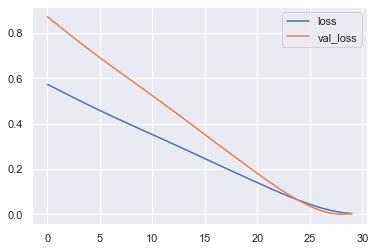

In [456]:
losses.plot()

When initializing model, we see that loss seems to minimize at 26 epochs then rise again slightly. Our validation loss falls with the loss, but starts to increase just before at around 25 epochs. Thus we do not want to train our data on more than 25 epochs to avoid overfitting.

### Predictions

We use a for loop to create a list of predictions from the data for a period that is just under what we selected for our training data. If we select too long of a period we will generate more noise.

In [457]:
test_predictions = [] #empty list

eval_batch = scaled_train[-length:]  #grab 1ast eval batch points from scaled_train set. Recall that is length of batches is 5 y So grab last 5 points of training set to predict 1 year into the future, and that is the first point in the test set (eval_batch_one).
current_batch = eval_batch.reshape((1,length,n_feature)) #reshape batch for model b/c we are passing in 1 item per batch. and set to length and 1 y feature for current batch 

for i in range(len(test)): # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    test_predictions.append(current_pred) #starts as empty list, and add current prediction to it.
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction. and toss out first item in list
   

In [458]:
#rescaling the prediction data so they match the original data. 
true_predictions = scaler.inverse_transform(test_predictions)

test['Predictions'] = true_predictions

test

,total_crimes_log,Predictions
2010-12-31,9.585690,9.615524
2011-12-31,9.611463,9.628784
2012-12-31,9.594105,9.647600
2013-12-31,9.584384,9.674730
2014-12-31,9.603193,9.694793
2015-12-31,9.633056,9.709223
2016-12-31,9.623046,9.724951
2017-12-31,9.613737,9.745294
2018-12-31,9.626218,9.767289
2019-12-31,9.615339,9.789889


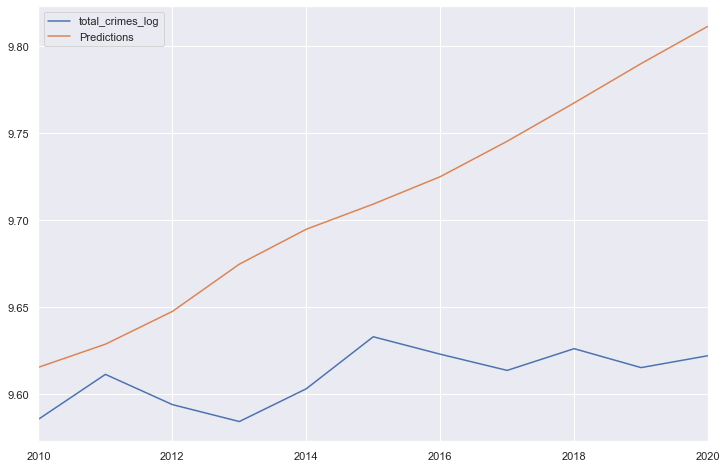

In [459]:
test.plot(figsize=(12,8))

#we see a trend which increases almost exponentially.

## Performance evaluation


In [460]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2010-12-31 to 2020-12-31
Freq: A-DEC
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_crimes_log  11 non-null     float64
 1   Predictions       11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


If we want to compare our data in the original scale, we can perform the inverse of the natural log transformation

In [461]:
test = np.exp(test) #don't want to repeat, so mark

test.rename(columns = {'total_crimes_log':'total_crimes', 'Predictions':'Predictions'}, inplace = True)
test


,total_crimes,Predictions
2010-12-31,14555.0,14995.777908
2011-12-31,14935.0,15195.950265
2012-12-31,14678.0,15484.578858
2013-12-31,14536.0,15910.421737
2014-12-31,14812.0,16232.866134
2015-12-31,15261.0,16468.797743
2016-12-31,15109.0,16729.870993
2017-12-31,14969.0,17073.692358
2018-12-31,15157.0,17453.382702
2019-12-31,14993.0,17852.321540


In [462]:
#Compare our inverse transformed data in the test set with our original 
#data, to be sure it is the same.
total_crime.loc[2011:] #original df of total crimes only, from 2011.

,total_crimes
year,
2011,14935
2012,14678
2013,14536
2014,14812
2015,15261
2016,15109
2017,14969
2018,15157
2019,14993


In [463]:
#from sklearn.metrics import mean_squared_error
#from sklearn import metrics

In [464]:
#Check https://analytics-at-sauder.github.io/nb0008_sales_forecast_part_2.html 
#for examples on how to look at error in forecasting.

In [465]:
fit_test =  test['total_crimes'].values - test['Predictions']

errors_mean = fit_test.mean()
errors_std = fit_test.std()

print('Residual mean: {:.2f}'.format(errors_mean))
print('Residual standard deviation: {:.2f}'.format(errors_std))

Residual mean: -1594.23
Residual standard deviation: 933.40


In [466]:
fit_test.head()

2010-12-31    -440.777908
2011-12-31    -260.950265
2012-12-31    -806.578858
2013-12-31   -1374.421737
2014-12-31   -1420.866134
Freq: A-DEC, Name: Predictions, dtype: float64

In [467]:
#Calculate key error metrics

MAE = np.mean(abs(fit_test))
MSE = np.mean(np.square(fit_test))
RMSE = np.sqrt(MSE)
MAPE = np.mean(abs(fit_test/test['total_crimes']))

display(pd.DataFrame({'MAE': MAE,
                      'MSE': MSE,
                      'RMSE': RMSE,
                      'MAPE': MAPE}, index=['Measurements']))

,MAE,MSE,RMSE,MAPE
Measurements,1594.228676,3.333590e+06,1825.8122,0.106426


In [468]:
#% of RMSE of the values in our test set
(RMSE/test['total_crimes'])*100

2010-12-31    12.544227
2011-12-31    12.225057
2012-12-31    12.439108
2013-12-31    12.560623
2014-12-31    12.326574
2015-12-31    11.963909
2016-12-31    12.084269
2017-12-31    12.197289
2018-12-31    12.046000
2019-12-31    12.177764
2020-12-31    12.094675
Freq: A-DEC, Name: total_crimes, dtype: float64

In [469]:
from statsmodels.graphics.tsaplots import plot_acf


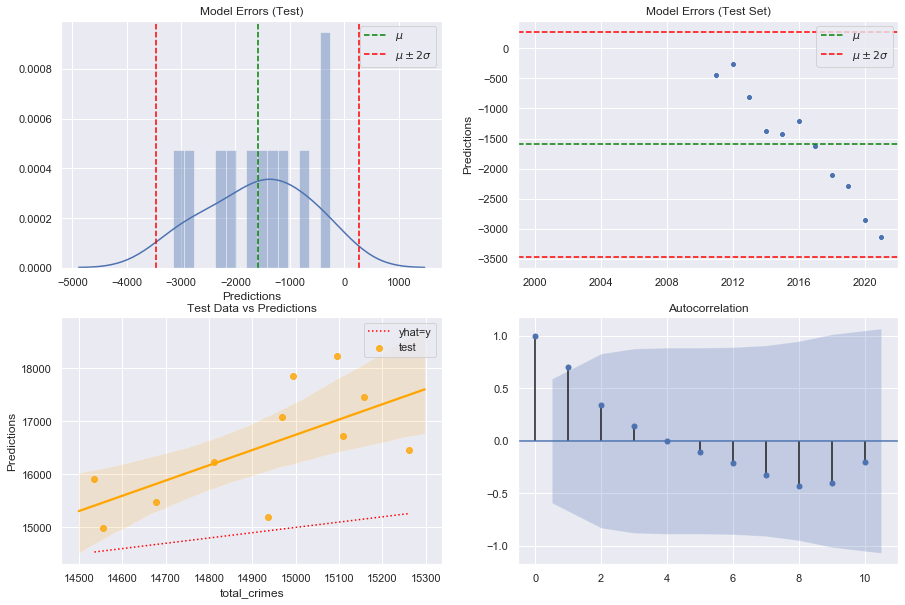

In [470]:
##Consider removing.


#Ref: https://analytics-at-sauder.github.io/nb0008_sales_forecast_part_2.html
# We can plot the residuals against the original data.
fig, axes = plt.subplots(2,2,figsize=(15,10))

# Plot residual distribution
sns.distplot(a=fit_test, ax=axes[0,0], bins=15)
axes[0,0].axvline(x=errors_mean, color='green', linestyle='--', label=r'$\mu$')
axes[0,0].axvline(x=errors_mean + 2*errors_std, color='red', linestyle='--', label=r'$\mu \pm 2\sigma$')
axes[0,0].axvline(x=errors_mean - 2*errors_std, color='red', linestyle='--')
axes[0,0].legend()
axes[0,0].set(title='Model Errors (Test)')

# Plot residuals against time
sns.scatterplot(x=test.index, y=fit_test, ax=axes[0,1])
axes[0,1].axhline(y=errors_mean, color='green', linestyle='--', label=r'$\mu$ ')
axes[0,1].axhline(y=errors_mean + 2*errors_std, color='red', linestyle='--', label=r'$\mu \pm 2\sigma$')
axes[0,1].axhline(y=errors_mean - 2*errors_std, color='red', linestyle='--')
axes[0,1].legend()
axes[0,1].set(title='Model Errors (Test Set)')

# Plot prediction against observations
sns.regplot(x=test['total_crimes'], y=test['Predictions'], color='orange', label='test', ax=axes[1,0])
# Generate diagonal line to plot.
d_x = np.linspace(start=test['total_crimes'].min()-0.1, stop=test['total_crimes'].max()+0.1, num=100)
axes[1,0].plot(d_x, d_x, color='red', label='yhat=y', ls=':')
axes[1,0].legend()
axes[1,0].set(title='Test Data vs Predictions')

# Plot autocorrelation of residuals
plot_acf(x=fit_test, ax=axes[1,1])

plt.show()

### Summary of error - training data and fitting

The RMSE is about 10% of the mean, which is not great.
We can plot our predictions vs our test data to see how much they deviate from a perfect fit.

We can see that our errors are quite skewed in one direction and not entirely normally distributed, this can be due to the method of transformation that we used on our data set.

Our residuals also seem to be autocorrelated and have a mean which is below 0, which means that the model is likely over fitting. 

Reference: https://analytics-at-sauder.github.io/nb0008_sales_forecast_part_2.html

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



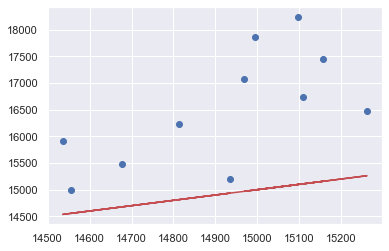

In [471]:
#Predictions
plt.scatter(test['total_crimes'], test['Predictions'])

#Perfect predictions
plt.plot(test['total_crimes'], test['total_crimes'], 'r')

From the plot, we se that the predictions are constantly over estimating the original test data set.

## Retrain and forecasting

In [472]:
total_crime_log.head()


,total_crimes_log
1965-12-31,8.660774
1966-12-31,8.705497
1967-12-31,8.764210
1968-12-31,8.874868
1969-12-31,8.940760


In [473]:
#Now using the full data set of total crime for the time range form 1965-2020.
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(total_crime_log)
len(scaled_full_data)

56

In [474]:
scaled_full_data.shape

(56, 1)

In [475]:
#Use the full data to generate a forecast.
length = 9
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length = length, stride=4)


We can use the same number of epochs until we saw our valication_loss start to increase in order to avoid overfitting our data.

We do not include earlystopping and validation data as previously because that would be cheating.

In [477]:
%%time
model = Sequential()

model.add(LSTM(100, activation = 'relu', input_shape=(length, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=20)

#WARNING:tensorflow:Can save best model only with val_loss available, skipping.


Epoch 1/20
1/1 [==============================] - 0s 77ms/step - loss: 0.7727
Epoch 2/20
1/1 [==============================] - 0s 65ms/step - loss: 0.7350
Epoch 3/20
1/1 [==============================] - 0s 113ms/step - loss: 0.6986
Epoch 4/20
1/1 [==============================] - 0s 92ms/step - loss: 0.6639
Epoch 5/20
1/1 [==============================] - 0s 97ms/step - loss: 0.6297
Epoch 6/20
1/1 [==============================] - 0s 123ms/step - loss: 0.5957
Epoch 7/20
1/1 [==============================] - 0s 94ms/step - loss: 0.5621
Epoch 8/20
1/1 [==============================] - 0s 116ms/step - loss: 0.5290
Epoch 9/20
1/1 [==============================] - 0s 96ms/step - loss: 0.4961
Epoch 10/20
1/1 [==============================] - 0s 117ms/step - loss: 0.4635
Epoch 11/20
1/1 [==============================] - 0s 109ms/step - loss: 0.4312
Epoch 12/20
1/1 [==============================] - 0s 78ms/step - loss: 0.3988
Epoch 13/20
1/1 [==============================] - 0s 97

In [478]:
forecast = [] #create an empty list

period = 4 #predictions for next 4 years

#grab 1ast eval batch points from scaled_training set. 
#Recall that is length of batches is 4 years. So grab last 4 points of 
#training set to predict 1 year into the future, and that is the first
#point in the test set (eval_batch). 
eval_batch = scaled_full_data[-length:]

#reshape batch for model b/c we are passing in 1 item per batch. 
#and set to length and 1 y feature for current batch 
current_batch = eval_batch.reshape((1,length,n_feature))

for i in range(period):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    forecast.append(current_pred) #starts as empty list, and add current prediction to it.
     # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction, and toss out first item in list
    

In [479]:
forecast

[array([0.6184857], dtype=float32),
 array([0.5926868], dtype=float32),
 array([0.5675179], dtype=float32),
 array([0.5406786], dtype=float32)]

In [480]:
#Transform data back to original scale.
forecast = scaler.inverse_transform(forecast)
forecast

array([[9.25342327],
       [9.22870206],
       [9.20458456],
       [9.17886648]])

Now we need to perform the inverse boxcox transform.

In [481]:
forecast = np.exp(forecast)

forecast

array([[10440.24435557],
       [10185.31302759],
       [ 9942.60721711],
       [ 9690.16250804]])

In [482]:
forecast_index = pd.date_range(start='2021', periods=period, freq='Y')

In [403]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [404]:
forecast_df

,Forecast
2021-12-31,15147.620312
2022-12-31,15232.780444
2023-12-31,15342.859245
2024-12-31,15433.904598


In [405]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-12-31 to 2024-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Forecast  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


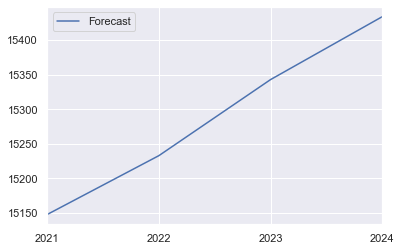

In [406]:
forecast_df.plot(xticks=forecast_df.index)

In [407]:
forecast_df.mean()

Forecast    15289.29115
dtype: float64

In [408]:
#look at mean for dates after 2009, i.e. from the test interval to the end.

tot_test = total_crime_ses.iloc[test_ind:] 

In [409]:
tot_test.mean()

total_crimes    14918.272727
dtype: float64

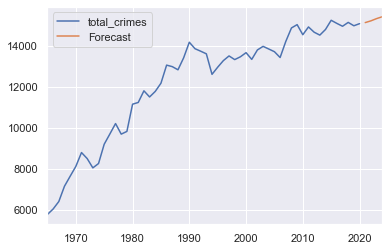

In [410]:
#Joing forecast with our original plot.
ax = total_crime_ses.plot()
forecast_df.plot(ax=ax)

## Summary

The forecasting seems to follow the trend of our last few data points. Since we do not have future data to compare, we cannot give an indication on the error in the projections, but we can note the trend.

In [411]:
###Model save
model.save('swedish_crime_Statistics_v1.h5') 

In [412]:
#later_model = load_model('swedish_crime_Statistics_v1.h5') #load saved model
#later_model.predict(new_data) #if we are given a data set from the next year, or from another country, we can update the model with a new fit, 
#as it might not be relevant to predict on old fit, we can check model drift.

## Final Notes: 

An interesting aspect of crime prevention as described by Brå: https://www.bra.se/forebygga-brott/samverkan/egna-forberedelser/identifiera-monster.html

#### Interpretation of crime and the statistics

In order to appropriately interpret the crime statistics one must be able to understand a number of things first. For example, 
1) how is a crime reported (single act for multiple instances of one person or one for each act, group crime etc.) 

2) When is crime reported, i.e. what are the statutes of limitations for crimes, if they occur in the same year as when they were reported or not. 

3) Historical trends, can they influence how often crimes are reported, e.g. #MeToo. 

4) Reporting, arrests and convictions, i.e. what percentage of the reported crimes are the crimes reported leading to arrests or convictions? 

5) Trust in the justice system, i.e. is there a propendency for certain groups to report crimes more or less to the police based on their level in trust in whether or not the police will take action or are affective in pursuing and solving the crime?

https://bra.se/statistik/kriminalstatistik/tolka-statistiken.html


Below is another method for transformation of data before LSTM method is applied. I do not cover it here, but save it for possible future use. 


## Box-Cox Transformation

Instead of applying a simple log transform, we can use another popular transformation of time-series data for forecasting such as box-cox. It is used to transform a non-normal distribution to a normal distribution with both logarithmic and power transformations.

The power transformation depends on the parameter $ \lambda $ as follows:

$$
y(\lambda) = \left\{
    \begin{array}\\
        log(y) & \text{if } \lambda = 0 \\
        (y^\lambda - 1) / \lambda  &  \text{otherwise}. \\
    \end{array}
\right.
$$

We can optimize the transformation by letting the function Box.Cox.lambda() choose a value of $ \lambda $  for us or select our own values to compare between natural log, $ \lambda = 1 $, and power transform $ \lambda ≠ 0 $ with scaling. In the special case, were $ \lambda = 1 $, there is no change in the shape of the data, but instead, the data becomes shifted downwards. For seasonal data, it is ideal to use a $ \lambda $ which transforms the data such that the amplitude of the searsonal variation is the same across the data set (Ref 1). Here, we do not have a seasonal dataset, but would none the less like to see how it affects our model performance.

Ref:
1) https://otexts.com/fpp2/transformations.html Detailed mathematical description.

2) https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/ General discussion on box-cox

3) https://mpra.ub.uni-muenchen.de/32294/1/Forecasting_BoxCox_PL.pdf Detailed study on box-cox and its applicability to improve modeling.





from scipy.stats import boxcox
from scipy.special import inv_boxcox, boxcox
## Alternatively:
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='box-cox')
#data = pt.fit_transform(data)

    
    
    
    
    
##create a copy, which will not affect the original sub-df!
total_crime_bc = total_crime_ses.copy()

total_crime_bc.info()
    
    
    
total_crime_bc.head()
    
    
    
Boxcox documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
    
    
    
#Example using boxcox, we can select a particular lamda to perform the 
#transformation.

#Let lambda be selected by model.
#total_crime_bc['total_crimes'] = boxcox(total_crime_bc['total_crimes'])

#Set lambda to a specified value.
#lam = 0.6 -> predictions blow up
lam = 0.1
total_crime_bc['total_crimes'] = boxcox(total_crime_bc['total_crimes'], lam)
print('Lambda: %f' % lam)

    
    
    
total_crime_bc.head()
    
    
    
    
#Display results

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,6))
fig.tight_layout(pad=2)
ax1.plot(total_crime['total_crimes'])
ax1.set_title("total_crime")

ax2.plot(total_crime_bc['total_crimes'])
ax2.set_title("total_crime_boxcox lambda=%1.1f" %lam)

ax3 = sns.distplot(total_crime_bc['total_crimes'], bins=30)
#xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax2.set_xticklabels(xlabels) #produce output for xticks in 'K'
#ax2.set_yscale("log")
ax3.set_title("box_cox_lmda=%1.1f" %lam)


plt.show()

#### Plot sns.distplot for before and after box-cox transformation to compare if the normalization works.


#### After modeling the data, we reverse transform.

If we want to compare our data in the original scale, we can perform the inverse of the Box-Cox transformation.

inv_boxcox(total_crime_bc, lam).head()


test = inv_boxcox(test, lam)



### Retraining after model is checked for error

##### should keep total_crimes_bc as it was, because no changes occured. From here do train and test allocation then model fit. 
#Set lambda to a specified value as previously.
lam = 0.4
total_crime_bc['total_crimes'] = boxcox(total_crime_bc['total_crimes'], lam)
print('Lambda: %f' % lam)

#### After model.fit can look at forecasts, with BC inverse.
forecast = inv_boxcox(forecast, lam)
forecast

total_crime_bc = inv_boxcox(total_crime_bc, lam)


#Joing forecast with our original plot.
ax = total_crime_bc.plot()
forecast_df.plot(ax=ax)
